In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Collection and Processing
heart_data = pd.read_csv(r"heart.3.csv")


In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Checking the distribution of Target Variable
print(heart_data['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [7]:
# Feature Selection
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [8]:
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [9]:
print(Y.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [10]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [12]:
# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    print(f'Accuracy on Training data ({model_name}): {training_data_accuracy}')
    
    X_test_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
    print(f'Accuracy on Test data ({model_name}): {test_data_accuracy}')
    
    # ROC AUC score and curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(Y_test, y_proba)
        fpr, tpr, _ = roc_curve(Y_test, y_proba)
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
        roc_auc = roc_auc_score(Y_test, y_proba)
        fpr, tpr, _ = roc_curve(Y_test, y_proba)
    else:
        roc_auc = None
        fpr, tpr = None, None
    
    # Precision, Recall, F1 Score
    precision = precision_score(Y_test, X_test_prediction)
    recall = recall_score(Y_test, X_test_prediction)
    f1 = f1_score(Y_test, X_test_prediction)
    
    # Saving the trained model
    filename = f'{model_name}_model.sav'
    pickle.dump(model, open(filename, 'wb'))
    print(f"Model saved as {filename}")
    
    return (training_data_accuracy, test_data_accuracy, roc_auc, fpr, tpr, precision, recall, f1)


In [13]:
# Dictionaries to store performance metrics
training_accuracies = {}
test_accuracies = {}
roc_auc_scores = {}
roc_curves = {}
precisions = {}
recalls = {}
f1_scores = {}

In [14]:
# Logistic Regression with regularization
log_reg_model = LogisticRegression(max_iter=1000, penalty='l2', C=0.1)
train_acc, test_acc, roc_auc, fpr, tpr, precision, recall, f1 = train_and_evaluate(log_reg_model, 'Logistic_Regression')
training_accuracies['Logistic_Regression'] = train_acc
test_accuracies['Logistic_Regression'] = test_acc
roc_auc_scores['Logistic_Regression'] = roc_auc
roc_curves['Logistic_Regression'] = (fpr, tpr)
precisions['Logistic_Regression'] = precision
recalls['Logistic_Regression'] = recall
f1_scores['Logistic_Regression'] = f1
print(f'Precision for Logistic Regression: {precision:.4f}')
print(f'Recall for Logistic Regression: {recall:.4f}')
print(f'F1 Score for Logistic Regression: {f1:.4f}')

Accuracy on Training data (Logistic_Regression): 0.8388429752066116
Accuracy on Test data (Logistic_Regression): 0.8032786885245902
Model saved as Logistic_Regression_model.sav
Precision for Logistic Regression: 0.8000
Recall for Logistic Regression: 0.8485
F1 Score for Logistic Regression: 0.8235


In [15]:
# Support Vector Machine (SVM) with hyperparameter tuning
param_grid_svm = {
    'C': [0.001, 0.1, 1, 10, 100, 1000], 
    'gamma': [0.001, 0.1, 1, 10, 100, 1000], 
    'kernel': ['linear', 'rbf', 'sigmoid']
}
svm_model = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, cv=10, scoring='accuracy', n_jobs=-1)
train_acc, test_acc, roc_auc, fpr, tpr, precision, recall, f1 = train_and_evaluate(svm_model, 'SVM_Optimized')
training_accuracies['SVM_Optimized'] = train_acc
test_accuracies['SVM_Optimized'] = test_acc
roc_auc_scores['SVM_Optimized'] = roc_auc
roc_curves['SVM_Optimized'] = (fpr, tpr)
precisions['SVM_Optimized'] = precision
recalls['SVM_Optimized'] = recall
f1_scores['SVM_Optimized'] = f1

Accuracy on Training data (SVM_Optimized): 0.859504132231405
Accuracy on Test data (SVM_Optimized): 0.8032786885245902
Model saved as SVM_Optimized_model.sav


In [16]:
# Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis()
train_acc, test_acc, roc_auc, fpr, tpr, precision, recall, f1 = train_and_evaluate(lda_model, 'LDA')
training_accuracies['LDA'] = train_acc
test_accuracies['LDA'] = test_acc
roc_auc_scores['LDA'] = roc_auc
roc_curves['LDA'] = (fpr, tpr)
precisions['LDA'] = precision
recalls['LDA'] = recall
f1_scores['LDA'] = f1

Accuracy on Training data (LDA): 0.8471074380165289
Accuracy on Test data (LDA): 0.819672131147541
Model saved as LDA_model.sav


In [17]:
# Decision Tree with Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=2), param_grid_dt, cv=10, scoring='accuracy', n_jobs=-1)
train_acc, test_acc, roc_auc, fpr, tpr, precision, recall, f1 = train_and_evaluate(dt_model, 'Decision_Tree_Optimized')
training_accuracies['Decision_Tree_Optimized'] = train_acc
test_accuracies['Decision_Tree_Optimized'] = test_acc
roc_auc_scores['Decision_Tree_Optimized'] = roc_auc
roc_curves['Decision_Tree_Optimized'] = (fpr, tpr)
precisions['Decision_Tree_Optimized'] = precision
recalls['Decision_Tree_Optimized'] = recall
f1_scores['Decision_Tree_Optimized'] = f1

Accuracy on Training data (Decision_Tree_Optimized): 0.8925619834710744
Accuracy on Test data (Decision_Tree_Optimized): 0.7704918032786885
Model saved as Decision_Tree_Optimized_model.sav


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=10)
train_acc, test_acc, _, _, _, precision, recall, f1 = train_and_evaluate(knn_model, 'KNN')
training_accuracies['KNN'] = train_acc
test_accuracies['KNN'] = test_acc
precisions['KNN'] = precision
recalls['KNN'] = recall
f1_scores['KNN'] = f1

Accuracy on Training data (KNN): 0.8553719008264463
Accuracy on Test data (KNN): 0.8360655737704918
Model saved as KNN_model.sav


In [19]:
# Random Forest with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_model = GridSearchCV(RandomForestClassifier(random_state=2), param_grid_rf, cv=10, scoring='accuracy', n_jobs=-1)
train_acc, test_acc, roc_auc, fpr, tpr, precision, recall, f1 = train_and_evaluate(rf_model, 'Random_Forest_Optimized')
training_accuracies['Random_Forest_Optimized'] = train_acc
test_accuracies['Random_Forest_Optimized'] = test_acc
roc_auc_scores['Random_Forest_Optimized'] = roc_auc
roc_curves['Random_Forest_Optimized'] = (fpr, tpr)
precisions['Random_Forest_Optimized'] = precision
recalls['Random_Forest_Optimized'] = recall
f1_scores['Random_Forest_Optimized'] = f1

C:\Users\acer\anaconda3\New folder\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy on Training data (Random_Forest_Optimized): 0.9504132231404959
Accuracy on Test data (Random_Forest_Optimized): 0.7540983606557377
Model saved as Random_Forest_Optimized_model.sav


In [20]:
# AdaBoost with Hyperparameter Tuning
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=2)
train_acc, test_acc, roc_auc, fpr, tpr, precision, recall, f1 = train_and_evaluate(ada_model, 'AdaBoost_Tuned')
training_accuracies['AdaBoost_Optimized'] = train_acc
test_accuracies['AdaBoost_Optimized'] = test_acc
roc_auc_scores['AdaBoost_Optimized'] = roc_auc
roc_curves['AdaBoost_Optimized'] = (fpr, tpr)
precisions['AdaBoost_Optimized'] = precision
recalls['AdaBoost_Optimized'] = recall
f1_scores['AdaBoost_Optimized'] = f1

C:\Users\acer\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy on Training data (AdaBoost_Tuned): 0.8760330578512396
Accuracy on Test data (AdaBoost_Tuned): 0.7704918032786885
Model saved as AdaBoost_Tuned_model.sav


In [21]:
# Ensemble Model - Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('lr', log_reg_model),
    ('svm', svm_model.best_estimator_),
    ('lda', lda_model),
    ('dt', dt_model.best_estimator_),
    ('knn', knn_model),
    ('rf', rf_model.best_estimator_),
    ('ada', ada_model)
], voting='soft')
train_acc, test_acc, roc_auc, fpr, tpr, precision, recall, f1 = train_and_evaluate(ensemble_model, 'Ensemble_Voting')
training_accuracies['Ensemble_Voting'] = train_acc
test_accuracies['Ensemble_Voting'] = test_acc
roc_auc_scores['Ensemble_Voting'] = roc_auc
roc_curves['Ensemble_Voting'] = (fpr, tpr)
precisions['Ensemble_Voting'] = precision
recalls['Ensemble_Voting'] = recall
f1_scores['Ensemble_Voting'] = f1

C:\Users\acer\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy on Training data (Ensemble_Voting): 0.8801652892561983
Accuracy on Test data (Ensemble_Voting): 0.8360655737704918
Model saved as Ensemble_Voting_model.sav


In [22]:
# Comparing Model Accuracy
print("\nTraining Accuracies:", training_accuracies)
print("Test Accuracies:", test_accuracies)
print("Precision Scores:", precisions)
print("Recall Scores:", recalls)
print("F1 Scores:", f1_scores)

best_model_train = max(training_accuracies, key=training_accuracies.get)
best_model_test = max(test_accuracies, key=test_accuracies.get)


print(f"\nBest model on training data: {best_model_train} with accuracy {training_accuracies[best_model_train]}")
print(f"Best model on test data: {best_model_test} with accuracy {test_accuracies[best_model_test]}")



Training Accuracies: {'Logistic_Regression': 0.8388429752066116, 'SVM_Optimized': 0.859504132231405, 'LDA': 0.8471074380165289, 'Decision_Tree_Optimized': 0.8925619834710744, 'KNN': 0.8553719008264463, 'Random_Forest_Optimized': 0.9504132231404959, 'AdaBoost_Optimized': 0.8760330578512396, 'Ensemble_Voting': 0.8801652892561983}
Test Accuracies: {'Logistic_Regression': 0.8032786885245902, 'SVM_Optimized': 0.8032786885245902, 'LDA': 0.819672131147541, 'Decision_Tree_Optimized': 0.7704918032786885, 'KNN': 0.8360655737704918, 'Random_Forest_Optimized': 0.7540983606557377, 'AdaBoost_Optimized': 0.7704918032786885, 'Ensemble_Voting': 0.8360655737704918}
Precision Scores: {'Logistic_Regression': 0.8, 'SVM_Optimized': 0.7837837837837838, 'LDA': 0.8055555555555556, 'Decision_Tree_Optimized': 0.8275862068965517, 'KNN': 0.8285714285714286, 'Random_Forest_Optimized': 0.78125, 'AdaBoost_Optimized': 0.8064516129032258, 'Ensemble_Voting': 0.8285714285714286}
Recall Scores: {'Logistic_Regression': 0.

In [23]:
# Determine the best model based on F1 Score
best_model_f1 = max(f1_scores, key=f1_scores.get)
print(f"\nBest model based on F1 Score: {best_model_f1} with F1 Score {f1_scores[best_model_f1]}")


Best model based on F1 Score: KNN with F1 Score 0.8529411764705882


In [24]:
# Determine and print the best model based on Precision Score
best_model_precision = max(precisions, key=precisions.get)
print(f"\nBest model based on Precision Score: {best_model_precision} with Precision Score {precisions[best_model_precision]:.2f}")


Best model based on Precision Score: KNN with Precision Score 0.83


In [25]:
# Determine and print the best model based on Recall Score
best_model_recall = max(recalls, key=recalls.get)
print(f"\nBest model based on Recall Score: {best_model_recall} with Recall Score {recalls[best_model_recall]:.2f}")


Best model based on Recall Score: SVM_Optimized with Recall Score 0.88


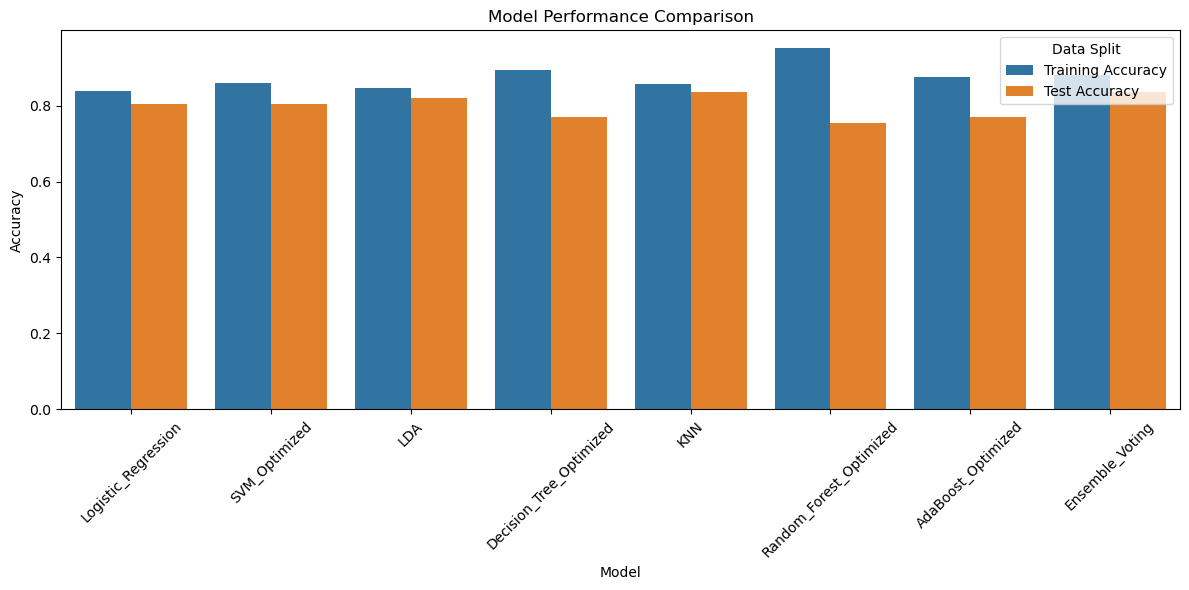

In [26]:
# Visualization of Model Performance
def plot_accuracies(training_accuracies, test_accuracies):
    models = list(training_accuracies.keys())
    train_accs = list(training_accuracies.values())
    test_accs = list(test_accuracies.values())
    
    df = pd.DataFrame({
        'Model': models,
        'Training Accuracy': train_accs,
        'Test Accuracy': test_accs
    })

    df_melted = df.melt(id_vars='Model', value_vars=['Training Accuracy', 'Test Accuracy'], 
                        var_name='Data Split', value_name='Accuracy')

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Accuracy', hue='Data Split', data=df_melted)
    plt.xticks(rotation=45)
    plt.title('Model Performance Comparison')
    plt.tight_layout()
    plt.show()

plot_accuracies(training_accuracies, test_accuracies)

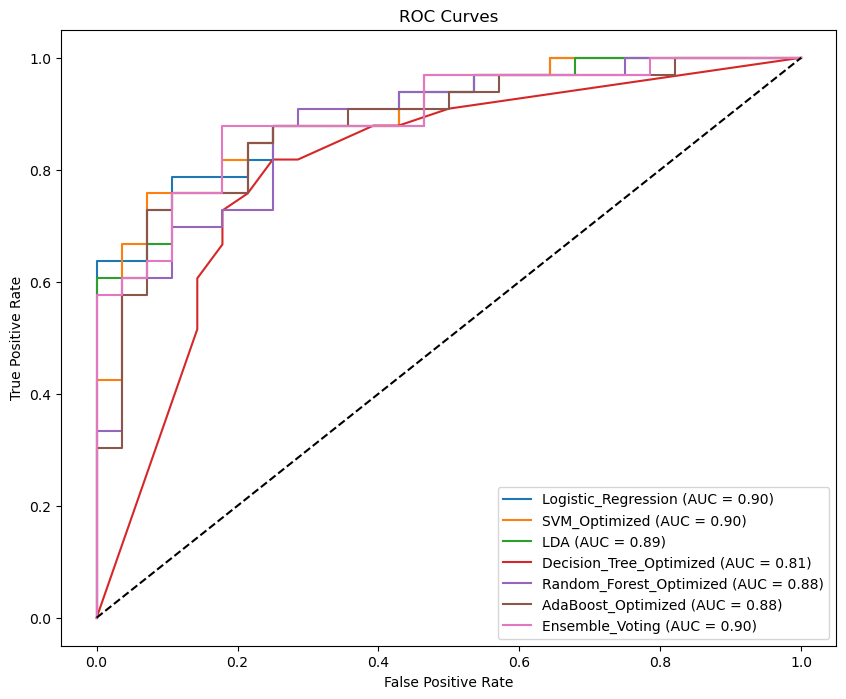

In [27]:
# Visualization of ROC Curves
def plot_roc_curves(roc_curves):
    plt.figure(figsize=(10, 8))
    for model_name, (fpr, tpr) in roc_curves.items():
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_scores[model_name]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

plot_roc_curves(roc_curves)


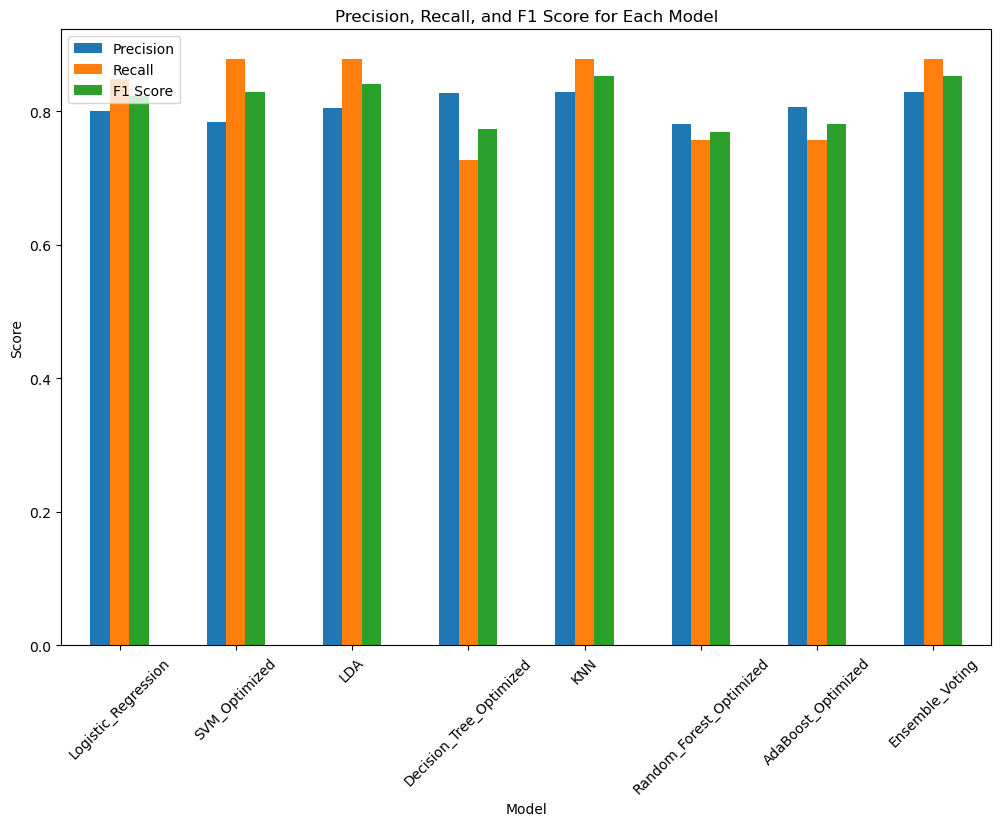

In [28]:
# Plotting Precision, Recall, and F1 Scores
metrics_df = pd.DataFrame({
    'Model': list(precisions.keys()),
    'Precision': list(precisions.values()),
    'Recall': list(recalls.values()),
    'F1 Score': list(f1_scores.values())
})

metrics_df.plot(kind='bar', x='Model', figsize=(12, 8))
plt.title('Precision, Recall, and F1 Score for Each Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

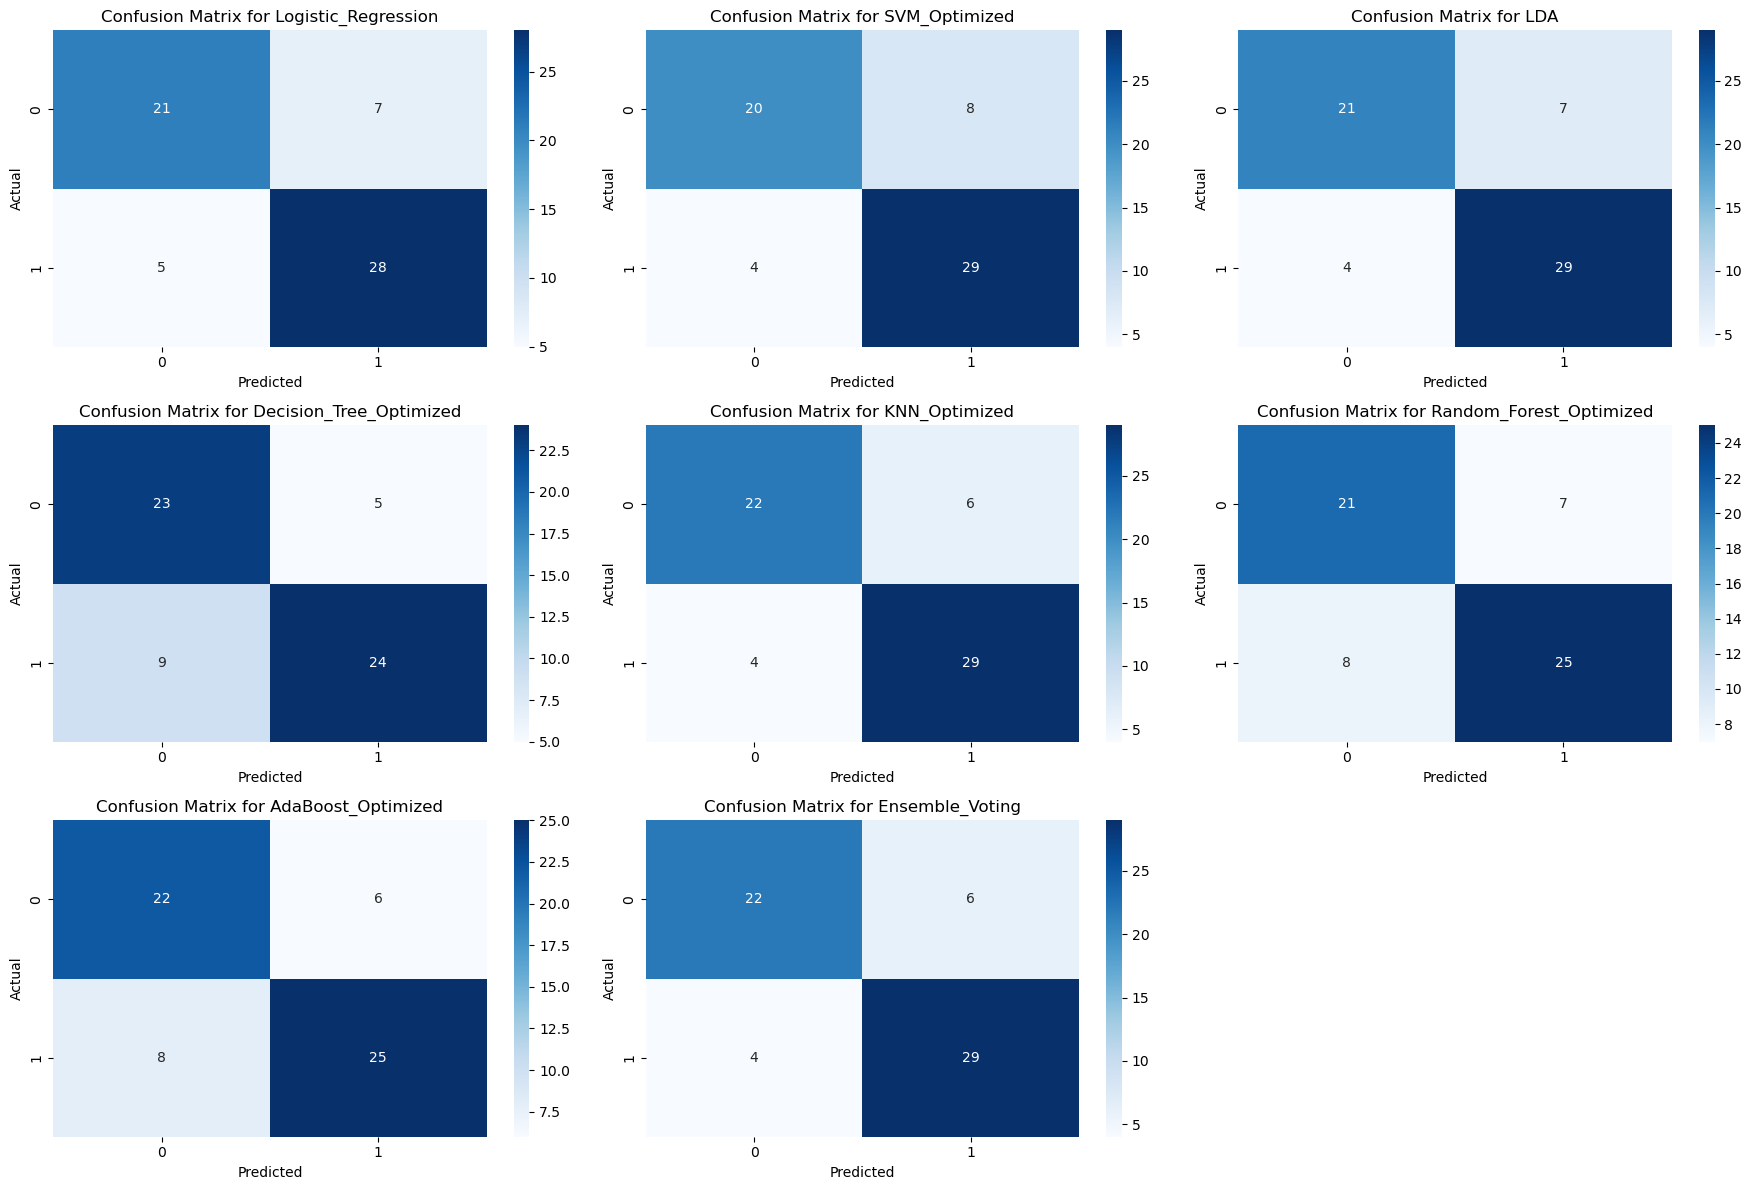

In [29]:
#Confusion Matrices
def plot_confusion_matrices(models):
    plt.figure(figsize=(18, 12))
    for i, (model_name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(Y_test, y_pred)
        plt.subplot(3, 3, i + 1)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

models = {
    'Logistic_Regression': log_reg_model,
    'SVM_Optimized': svm_model.best_estimator_,
    'LDA': lda_model,
    'Decision_Tree_Optimized': dt_model.best_estimator_,
    'KNN_Optimized': knn_model,
    'Random_Forest_Optimized': rf_model.best_estimator_,
    'AdaBoost_Optimized': ada_model,
    'Ensemble_Voting': ensemble_model
}

plot_confusion_matrices(models)